#### Importing Libraries and Dataset

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN 
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns
import pickle
import functools
import fastdtw
import scipy.spatial.distance as sd
import time
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
consumption_df

2022-04-26 15:02:16.558175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-26 15:02:16.558204: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.0110,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.4510,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.5050,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.4410,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.4680,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.5802,28,0.028408,0.038470,0.069307,0.801381,0.002441
611014,123762,2020-05-19 20:00:00,3.4398,28,0.027762,0.038479,0.067384,0.770210,0.002348
611015,123763,2020-05-19 21:00:00,2.3049,28,0.022537,0.038556,0.051836,0.518247,0.001601
611016,123764,2020-05-19 22:00:00,2.4921,28,0.023399,0.038544,0.054401,0.559808,0.001724


In [2]:
if 'Unnamed: 0' in consumption_df.columns:
    consumption_df.drop('Unnamed: 0',axis=1, inplace = True)

In [3]:
consumption_df

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.0110,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.4510,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.5050,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.4410,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.4680,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
611013,2020-05-19 19:00:00,3.5802,28,0.028408,0.038470,0.069307,0.801381,0.002441
611014,2020-05-19 20:00:00,3.4398,28,0.027762,0.038479,0.067384,0.770210,0.002348
611015,2020-05-19 21:00:00,2.3049,28,0.022537,0.038556,0.051836,0.518247,0.001601
611016,2020-05-19 22:00:00,2.4921,28,0.023399,0.038544,0.054401,0.559808,0.001724


#### Converting Dataset to House-wise dictionary

In [4]:
house_wise_consumption = dict()
for house_number in consumption_df['House Number'].unique():
    house_data = consumption_df[consumption_df['House Number'] == house_number]
    house_wise_consumption[house_number] = house_data.copy()
house_wise_consumption[1]
# house_wise_consumption[14]['timestamp'].iloc[0]
# house_wise_consumption[14]['timestamp'].iloc[-1]
# house_wise_consumption[14]['House Number'].iloc[0]

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
29226,2015-10-02 20:00:00,2.101,1,0.011621,0.019273,0.026968,0.276137,0.000851
29227,2015-10-02 21:00:00,1.646,1,0.010396,0.019291,0.023322,0.217043,0.000675
29228,2015-10-02 22:00:00,1.319,1,0.009516,0.019304,0.020701,0.174573,0.000549
29229,2015-10-02 23:00:00,1.473,1,0.009930,0.019298,0.021935,0.194574,0.000609


In [5]:
# TODO: Print the usage pattern in form of a graph
# Each cluster represents one line in the time series graph
# Plot december consumption (2017) values for each house belonging to the same cluster in a single graph
# Also plot for the whole year (annual 2017) for each house belonging to the same cluster in a single graph

#### Comparing Timestamps for clustering

In [6]:
timestamp_comparison = list()
for house in house_wise_consumption:
    first_timestamp = house_wise_consumption[house]['timestamp'].iloc[0]
    last_timestamp = house_wise_consumption[house]['timestamp'].iloc[-1]
    timestamp_comparison.append([house, first_timestamp, last_timestamp])
timestamp_comparison
timestamp_comparison_df = pd.DataFrame(timestamp_comparison, columns = ['House', 'First Timestamp', 'Last Timestamp'])
timestamp_comparison_df

,House,First Timestamp,Last Timestamp
0,1,2012-06-01 01:00:00,2015-10-03 00:00:00
1,2,2016-06-09 00:00:00,2019-11-20 23:00:00
2,3,2015-01-27 00:00:00,2018-01-29 23:00:00
3,4,2015-01-30 00:00:00,2018-01-29 23:00:00
4,5,2015-01-30 00:00:00,2018-01-29 23:00:00
5,6,2015-01-30 00:00:00,2018-01-29 23:00:00
6,7,2015-05-30 00:00:00,2018-01-29 23:00:00
7,8,2015-02-21 00:00:00,2018-02-20 23:00:00
8,9,2015-05-01 00:00:00,2018-02-21 23:00:00
9,10,2015-02-21 00:00:00,2018-02-20 23:00:00


In [7]:
# houses_with_ts = []
# sample_timestamp = '2017-11-01 00:00:00'
# for house in house_wise_consumption:
#     if sample_timestamp in house_wise_consumption[house]['timestamp'].unique():
#         houses_with_ts.append(house)
# len(houses_with_ts)
#house_wise_consumption[8][house_wise_consumption[8]['timestamp'] >= '2017-11-17'].head(60)

#### Creating a December consumption dictionary of dataframes

In [8]:
december_consumption = dict()
for house in house_wise_consumption:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= '2017-11-25') & (house_wise_consumption[house]['timestamp'] >= '2017-11-01')]
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)
def calculate_rows():
    december_rows = []
    for house in december_consumption:
        december_rows.append([house, len(december_consumption[house])])
    december_rows
    december_rows_df = pd.DataFrame(december_rows, columns = ['House', 'Rows'])
    return december_rows_df
def calculate_incomplete_rows():
    december_rows_df = calculate_rows()
    december_rows_incomplete_df = december_rows_df[(december_rows_df['Rows'] > 0) & (december_rows_df['Rows'] < 576)]
    return december_rows_incomplete_df
def fill_na_december_consumption(complete_df, incomplete_df):
    complete_df = complete_df.copy()
    year_incomplete = pd.Timestamp(incomplete_df.iloc[0]['timestamp']).year
    year_complete = pd.Timestamp(complete_df.iloc[0]['timestamp']).year
    complete_df['timestamp'] = complete_df['timestamp'].str.replace(str(year_complete), str(year_incomplete))
    fill_missing_values = complete_df[~complete_df.timestamp.isin(incomplete_df.timestamp)].copy()
    #print(fill_missing_values)
    fill_columns = ['energy_kWh', 'electronics workbench energy', 'network equipment energy', 'home office energy', 'RAE home office energy','RAE Mobile Phone Charger Energy']
    for fill_column in fill_columns:
        fill_missing_values[fill_column] = incomplete_df[fill_column].mean()
    incomplete_df = pd.concat([incomplete_df, fill_missing_values])
    incomplete_df = incomplete_df.sort_values(by=['timestamp'])
    return incomplete_df
def calculate_missing_december_rows():
    december_rows_df = calculate_rows()
    december_rows_missing_df = december_rows_df[(december_rows_df['Rows'] == 0)]
    return december_rows_missing_df
calculate_rows()

,House,Rows
0,1,0
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,448
8,9,576
9,10,576


In [9]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

##### Houses with no December-17 consumption values

In [10]:
timestamp_comparison_df.set_index('House').join(calculate_missing_december_rows().set_index('House'), how='inner')

,First Timestamp,Last Timestamp,Rows
House,,,
1,2012-06-01 01:00:00,2015-10-03 00:00:00,0
17,2016-06-01 00:00:00,2017-04-29 23:00:00,0
26,2019-11-29 00:00:00,2020-05-20 23:00:00,0
27,2019-03-06 00:00:00,2020-05-20 23:00:00,0
28,2018-08-01 00:00:00,2020-05-19 23:00:00,0


In [11]:
missing_december_houses_dates = {
    1: ['2014-11-25', '2014-11-01'],
    17: ['2016-11-25', '2016-11-01'],
    26: ['2019-11-25', '2019-11-01'],
    27: ['2019-11-25', '2019-11-01'],
    28: ['2019-11-25', '2019-11-01'],
}

In [12]:
for house in missing_december_houses_dates:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= missing_december_houses_dates[house][0]) & (house_wise_consumption[house]['timestamp'] >= missing_december_houses_dates[house][1])]
    #print((house, missing_december_houses_dates[house][0]))
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)

##### Filling missing values for December consumption

In [13]:
calculate_incomplete_rows()

,House,Rows
16,17,574
26,27,571
27,28,572


In [14]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

In [15]:
#calculate_rows()december_consumption

#### Houses to be clustered

In [16]:
##print('Houses to be clustered: ')
clustered_df = calculate_rows()[calculate_rows()['Rows'] ==  576]
clustered_df

,House,Rows
0,1,576
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,576
8,9,576
9,10,576


#### Converting to clustering matrix

In [17]:
clustering_matrix = []
for house in calculate_rows()[calculate_rows()['Rows'] ==  576]['House']:
    clustering_matrix.append(np.array(december_consumption[house]['energy_kWh']).reshape(-1,1))
clustering_matrix = np.array(clustering_matrix)
clustering_matrix.shape

(27, 576, 1)

#### Time series clustering of all households except house 26

In [18]:
# km_sdtw = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=5,
#                             max_iter_barycenter=5,
#                             metric_params={"gamma": .5},
#                             random_state=0).fit_predict(clustering_matrix)

In [19]:
# len(km_sdtw)

In [20]:
# clustered_df['Cluster'] = km_sdtw

In [21]:
#clustered_df = clustered_df[['House', 'Cluster']].set_index('House')
# clustered_df[clustered_df['Cluster'] == 3]

In [22]:
clustered_df = pd.read_csv('Tables/clustered.csv')
clustered_df

,House,Cluster
0,1,0
1,2,2
2,3,3
3,4,0
4,5,3
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


#### Used Scenarios

In [23]:
data = [[1, 4, 6, 'Yes'], [2, 1, 6, 'Yes'], [3, 4, 1, 'No'], [4, 1, 1, 'No']]
df = pd.DataFrame(data, columns = ['Scenarios', 'No. of subsets', 'No. of features', 'Smart devices included in modeling?']).set_index('Scenarios')
df

,No. of subsets,No. of features,Smart devices included in modeling?
Scenarios,,,
1,4,6,Yes
2,1,6,Yes
3,4,1,No
4,1,1,No


#### Time-series LSTM-based predictive modeling

In [24]:
n_past = 48
n_future = 1

In [25]:
### Energy generation dataframe
generation_df = pd.read_csv('Final Datasets/energy_generation.csv')
generation_df

,timestamp,Wind Energy,Solar Energy
0,2012-01-01 00:00:00,0.168265,0.0
1,2012-01-01 01:00:00,0.168265,0.0
2,2012-01-01 02:00:00,0.168265,0.0
3,2012-01-01 03:00:00,0.168265,0.0
4,2012-01-01 04:00:00,0.168265,0.0
...,...,...,...
78907,2020-12-31 19:00:00,1.710441,0.0
78908,2020-12-31 20:00:00,1.710441,0.0
78909,2020-12-31 21:00:00,1.497873,0.0
78910,2020-12-31 22:00:00,1.285454,0.0


In [26]:
class House:
    cols = ['energy_kWh', 'electronics workbench energy', 'network equipment energy',
            'home office energy', 'RAE home office energy', 'RAE Mobile Phone Charger Energy']
    def __init__(self, house):
        self.house = house
        self.consumption_df = house_wise_consumption[house].copy()[House.cols].astype(float)
        self.train_dates_df = house_wise_consumption[house]['timestamp']
        self.prepare_dataset(n_future, n_past)
    
    def __repr__(self):
        return str(self.house)
    
    def prepare_dataset(self, n_future = 1, n_past = 48):
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []
        consumption_np = np.array(self.consumption_df)
        #Reformat input data into a shape: (n_samples x timesteps x n_features)
        #In my example, my self.consumption_df has a shape (12823, 5)
        #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
        for i in range(n_past, len(consumption_np) - n_future +1):
            trainX.append(consumption_np[i - n_past:i, 0:self.consumption_df.shape[1]])
            trainY.append(consumption_np[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        #print('trainX shape == {}.'.format(trainX.shape))
        #print('trainY shape == {}.'.format(trainY.shape))
        self.trainX = trainX
        self.trainY = trainY

class Cluster: 
    def __init__(self, houses):
        self.houses = [House(house) for house in houses]
        self.trainX_list = (list(map(lambda x: x.trainX, self.houses)))
        self.trainY_list = (list(map(lambda x: x.trainY, self.houses)))
        self.train_dates_list = (list(map(lambda x: x.train_dates_df, self.houses)))
        self.consumption_df_list = (list(map(lambda x: x.consumption_df, self.houses)))
        self.prepare_dataset()
        
    
    def prepare_dataset(self):
        
        self.train_dates = np.concatenate(self.train_dates_list, axis=0)
        ## TODO - Replace concatenate with for loop or sort by time
        self.X = np.concatenate(self.trainX_list, axis=0)
        self.Y = np.concatenate(self.trainY_list, axis=0)
    
    
    def prepare_ANN_model(self):
        model = Sequential()
        #model.add(Dense(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2])))
        model.add(Dense(128, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(Dense(32, activation='relu', return_sequences=True))
        model.add(Dense(16, activation='relu', return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
        model.summary()
        return model
    
    def prepare_RNN_model(self):
        model = Sequential()
        #model.add(SimpleRNN(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(SimpleRNN(128, activation='tanh', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(SimpleRNN(32, activation='tanh', return_sequences=True))
        model.add(SimpleRNN(16, activation='tanh', return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()])
        model.summary()
        return model
    
    def prepare_LSTM_model(self):
        model = Sequential()
        #model.add(LSTM(1, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(128, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(32, activation='relu', return_sequences=True))
        model.add(LSTM(16, activation='relu', return_sequences=False))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
        model.summary()
        return model
    
    def train_model(self, model_name='LSTM'):
        if model_name == 'LSTM':
            model = self.prepare_LSTM_model()
        if model_name == 'RNN':
            model = self.prepare_RNN_model()    
        if model_name == 'ANN':
            model = self.prepare_ANN_model()    
        history = model.fit(self.X, self.Y, epochs=10, batch_size=16, validation_split=0.3, verbose=1) # Change to 30
        self.history = history
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Testing loss')
        
        plt.legend()
        return model
    
    def predicted(self, model_name='LSTM'):
        model = self.train_model(model_name)
        predictions = list(map(lambda x: pd.Series(model.predict(x).reshape(1,-1)[0]), self.trainX_list))
        #return pd.Series(model.predict(self.X).reshape(1,-1)[0])
        self.model = model
        return dict(zip(self.houses, predictions))
    
    def results(self, model_name='LSTM'):
        predicted = self.predicted(model_name)
        house_prediction_list_df  = {}
        for house in predicted:
            house_prediction_df = house.consumption_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['timestamp'] = house.train_dates_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['energy_predicted'] = predicted[house]
            ### Anomaly Detection
            energy_stddev = house_prediction_df['energy_kWh'].std()
            house_prediction_df['Energy Consumption Error'] = house_prediction_df['energy_predicted'] - house_prediction_df['energy_kWh']
            house_prediction_df['Anomaly detected'] = house_prediction_df['Energy Consumption Error'].apply(lambda x: False if abs(x) < 1.5*energy_stddev else abs(x))
            ### Energy Deficit Calculation
            house_prediction_df['timestamp'] = pd.DatetimeIndex(house_prediction_df['timestamp'])
            generation_df['timestamp'] = pd.DatetimeIndex(generation_df['timestamp'])
            house_prediction_df = house_prediction_df.set_index('timestamp').join(generation_df.set_index('timestamp'))
            house_prediction_df['timestamp'] = house_prediction_df.index
            house_prediction_df.reset_index(drop=True, inplace=True)
            house_prediction_df['Total Generated Energy'] = house_prediction_df['Wind Energy']+ house_prediction_df['Solar Energy']
            house_prediction_df['Predicted Energy Deficit'] = house_prediction_df['Total Generated Energy'] - house_prediction_df['energy_predicted']
            house_prediction_df['Energy Deficit Flag'] = house_prediction_df['Predicted Energy Deficit'].apply(lambda x: False if x>0 else abs(x))
            house_prediction_list_df[house.house] = house_prediction_df
        return house_prediction_list_df

## Model Name

In [27]:
model_name='RNN'

# ts stores the time in seconds
before_ts = time.time()
  
# print the current timestamp
print(before_ts)

1650965539.2908723


#### Scenario 2

2022-04-26 15:02:21.535466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-26 15:02:21.535497: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 15:02:21.535518: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rishabh-Inspiron): /proc/driver/nvidia/version does not exist
2022-04-26 15:02:21.535832: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 48, 128)           17280     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 48, 32)            5152      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
_________________________________________________________________


2022-04-26 15:02:21.849001: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 488322432 exceeds 10% of free system memory.


Epoch 1/10
26494/26494 [==============================] - 814s 31ms/step - loss: 0.3729 - root_mean_squared_error: 0.6106 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 516968.9688 - mean_squared_error: 0.3729 - val_loss: 0.3627 - val_root_mean_squared_error: 0.6023 - val_mean_absolute_error: 0.3322 - val_mean_absolute_percentage_error: 72214.0312 - val_mean_squared_error: 0.3627
Epoch 2/10
26494/26494 [==============================] - 657s 25ms/step - loss: 0.3513 - root_mean_squared_error: 0.5927 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 496781.1250 - mean_squared_error: 0.3513 - val_loss: 0.3448 - val_root_mean_squared_error: 0.5872 - val_mean_absolute_error: 0.3607 - val_mean_absolute_percentage_error: 108903.5156 - val_mean_squared_error: 0.3448
Epoch 3/10
26494/26494 [==============================] - 869s 33ms/step - loss: 0.3490 - root_mean_squared_error: 0.5908 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 502213.8438 -

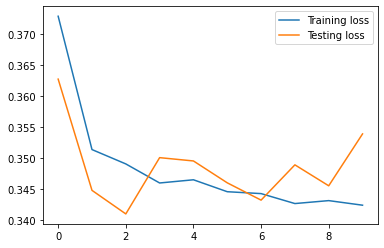

In [28]:
all_houses = list(clustered_df['House'])
all_cluster = Cluster(all_houses)
all_cluster_results = all_cluster.results(model_name)
print('Training History without clustering:')
# ts stores the time in seconds
after_ts = time.time()
  
# print the current timestamp
print(after_ts)

print("Elapsed time: ", after_ts - before_ts)

In [29]:
### Save Scenario 2 models
all_cluster.model.save(f'Models/Scenario2/{model_name}/all_cluster')

## Pickling Scenario 2 cluster and cluster result files
all_cluster_file = open(f"Models/Scenario2/Objects/{model_name}/all_cluster.pickle", "wb+")
pickle.dump(all_cluster, all_cluster_file)
all_cluster_file.close()

all_cluster_results_file = open(f"Models/Scenario2/Objects/{model_name}/all_cluster_results.pickle", "wb+")
pickle.dump(all_cluster_results, all_cluster_results_file)
all_cluster_results_file.close()

2022-04-26 17:05:32.680665: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Models/Scenario2/RNN/all_cluster/assets
INFO:tensorflow:Assets written to: ram://74cbebe7-5c28-433b-afa1-236c0f22bbab/assets


#### Predictions Graph functions

In [30]:
def x_axis_label_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    label = pd.Timestamp(label)
    month = label.month_name()[:3]
    #if month == 'Jan':
    month += f'\n{label.year}'
    return month

def graph_predictions(cluster_specific_results, all_results):
    first_house = list(cluster_specific_results.keys())[0]
    df1 = cluster_specific_results[first_house][['timestamp','energy_predicted', 'energy_kWh']]
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df1 = df1.set_index('timestamp')
    df1['energy_predicted_without_clustering']= np.array(all_results[first_house][['energy_predicted']])
    df1.rename({'energy_predicted':'energy_predicted_with_clustering', 'energy_kWh':'real_energy'},axis = 1, inplace = True)
    ax = df1[::300].plot.line(figsize=(20,10))
    #ax.set_xticklabels(map(x_axis_label_format, df1[::int(len(df1)/8)+1].index))
    #import matplotlib.dates as mdates
    #myFmt = mdates.DateFormatter('%Y-%m')
    #ax.xaxis.set_major_formatter(myFmt)
    ax.set_title(f'Predictions for house {first_house}')

#### Predictions for Scenario 1 and Scenario 2 

/tmp/ipykernel_12231/442122963.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


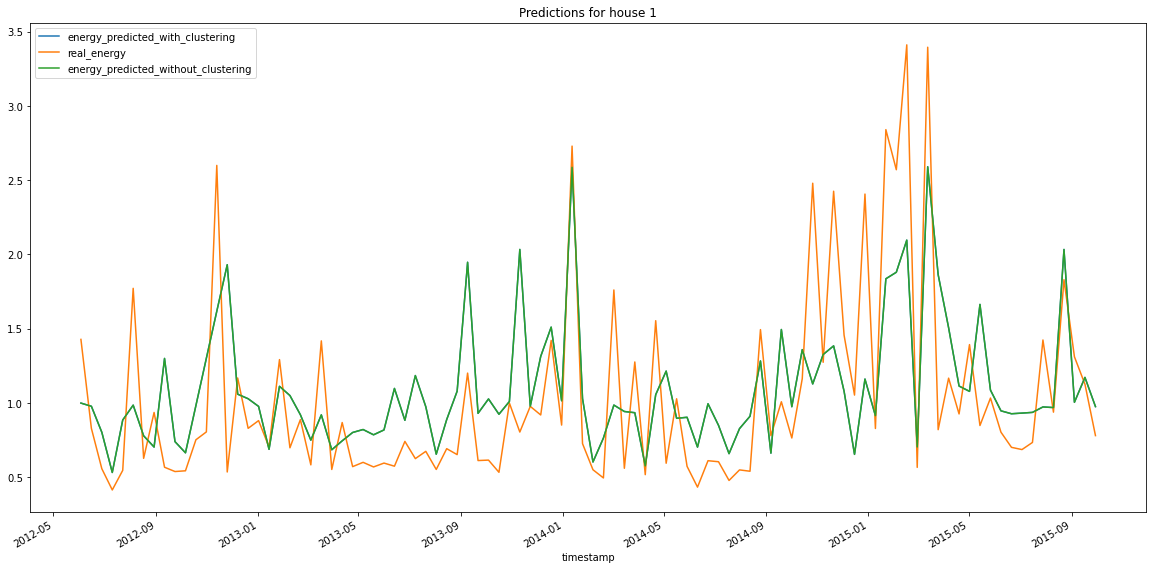

In [31]:
graph_predictions(all_cluster_results, all_cluster_results)

### Function to create tables

In [32]:
def create_metrics(scenario_results, val=False):
    # tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()
    if val == False:
        rmse = 'root_mean_squared_error'
        mae = 'mean_absolute_error'
        mape = 'mean_absolute_percentage_error'
        mse = 'mean_squared_error'
    else:
        rmse = 'val_root_mean_squared_error'
        mae = 'val_mean_absolute_error'
        mape = 'val_mean_absolute_percentage_error'
        mse = 'val_mean_squared_error'
        
    scenario_rmse = list(map(lambda x: x.history.history[rmse],scenario_results))
    scenario_mae = list(map(lambda x: x.history.history[mae],scenario_results))
    scenario_mape = list(map(lambda x: x.history.history[mape],scenario_results))
    scenario_mse = list(map(lambda x: x.history.history[mse],scenario_results))
    scenario_rmse = np.array(scenario_rmse).reshape(-1,)
    scenario_mae = np.array(scenario_mae).reshape(-1,)
    scenario_mape = np.array(scenario_mape).reshape(-1,)
    scenario_mse = np.array(scenario_mse).reshape(-1,)
    return [np.min(scenario_rmse),np.max(scenario_rmse),np.mean(scenario_rmse),np.min(scenario_mae),np.max(scenario_mae),np.mean(scenario_mae)
           ,np.min(scenario_mape),np.max(scenario_mape),np.mean(scenario_mape)
           ,np.min(scenario_mse),np.max(scenario_mse),np.mean(scenario_mse)]

#### Scenario 1 and Scenario 2 Metric Tables

In [33]:
scenario_2_results = [all_cluster]
scenario_2_metrics = create_metrics(scenario_2_results)
scenario_2_validation_metrics = create_metrics(scenario_2_results, val= True)
scenario_2_metrics

[0.5851300358772278,
 0.6106157898902893,
 0.5900919020175934,
 0.3216460049152374,
 0.3470097482204437,
 0.3271737575531006,
 391342.84375,
 516968.96875,
 473053.878125,
 0.3423771262168884,
 0.3728516697883606,
 0.3482605814933777]

In [34]:
# print('Training metrics:')
# df = pd.DataFrame([scenario_1_metrics, scenario_2_metrics, scenario_3_metrics, scenario_4_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE',
#                                                                                                                               'Min MAPE', 'Max MAPE', 'Mean MAPE',
#                                                                                                                               'Min MSE', 'Max MSE', 'Mean MSE'])
# df['Scenario'] = np.array([1,2,3,4])
# df.set_index('Scenario').round(decimals=2).to_csv('Tables/training_metrics.csv')

In [35]:
# print('Validation metrics:')
# df = pd.DataFrame([scenario_1_validation_metrics, scenario_2_validation_metrics,
#                    scenario_3_validation_metrics, scenario_4_validation_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE',
#                                                                                                                               'Min MAPE', 'Max MAPE', 'Mean MAPE',
#                                                                                                                               'Min MSE', 'Max MSE', 'Mean MSE'])
# df['Scenario'] = np.array([1,2,3,4])
# df.set_index('Scenario').round(decimals=2).to_csv('Tables/validation_metrics.csv')

### Anomaly Distribution

In [36]:
def create_anomaly_df(result_df, scenario_name, monthly_agg = True):    
    #print(type(result_df))
    anomaly_df = result_df[['timestamp', 'Anomaly detected']]
    anomaly_df.set_index('timestamp', inplace = True)
    if monthly_agg:
        anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)
        anomaly_df = anomaly_df.resample("M").agg('sum')
    else: 
        anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)
    anomaly_df = anomaly_df.rename(columns={'Anomaly detected': scenario_name})
    return anomaly_df

def create_anomalies_graph( title = None, **kwargs):
    anomaly_dfs = []
    for scenario_name, result_df in kwargs.items():
        anomaly_df = create_anomaly_df(result_df, scenario_name)
        anomaly_dfs.append(anomaly_df)
    anomaly_df = functools.reduce(lambda left, right: left.join(right), anomaly_dfs)
    ax = anomaly_df.plot.line(figsize=(20,10))
    ax.set_xlabel(f'Time')
    ax.set_ylabel(f'Frequency')
    ax.set_title(title)
    #return anomaly_dfs


In [37]:
def dtw_distance(series1, series2):
    return fastdtw.fastdtw(series1,series2)[0]

def create_distance_df(title, **kwargs):
    print(title)
    anomaly_dfs = []
    for scenario_name, result_df in kwargs.items():
        anomaly_df = np.array(create_anomaly_df(result_df, scenario_name, monthly_agg=False)).reshape(1,-1)
        anomaly_dfs.append(anomaly_df)
    anomaly_distributions = np.array(anomaly_dfs).reshape(len(kwargs),-1)
    distance_matrix = sd.squareform(sd.pdist(anomaly_distributions, dtw_distance))
    return(pd.DataFrame(distance_matrix, columns = kwargs.keys(), index = kwargs.keys()))
    #return anomaly_dfs


/tmp/ipykernel_12231/3162963936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)


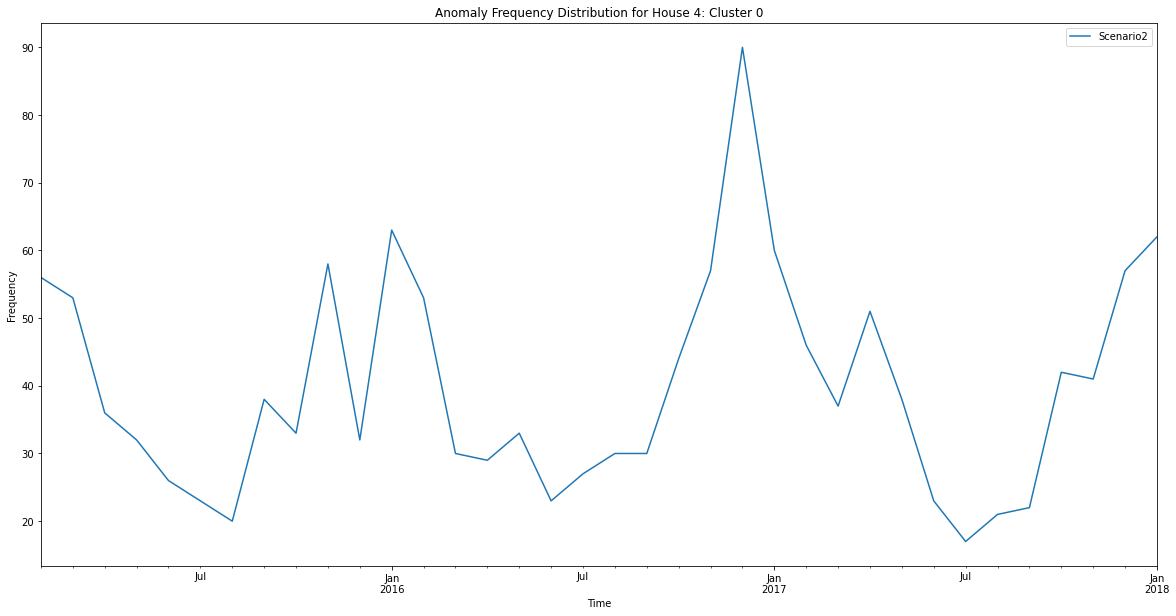

In [38]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 4: Cluster 0', Scenario2 = all_cluster_results[4])

In [39]:
create_distance_df('Similarity between anomaly distributions for House 4: Cluster 0', Scenario2 = all_cluster_results[4]).round(decimals=2)

Similarity between anomaly distributions for House 4: Cluster 0


/tmp/ipykernel_12231/3162963936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/3162963936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)


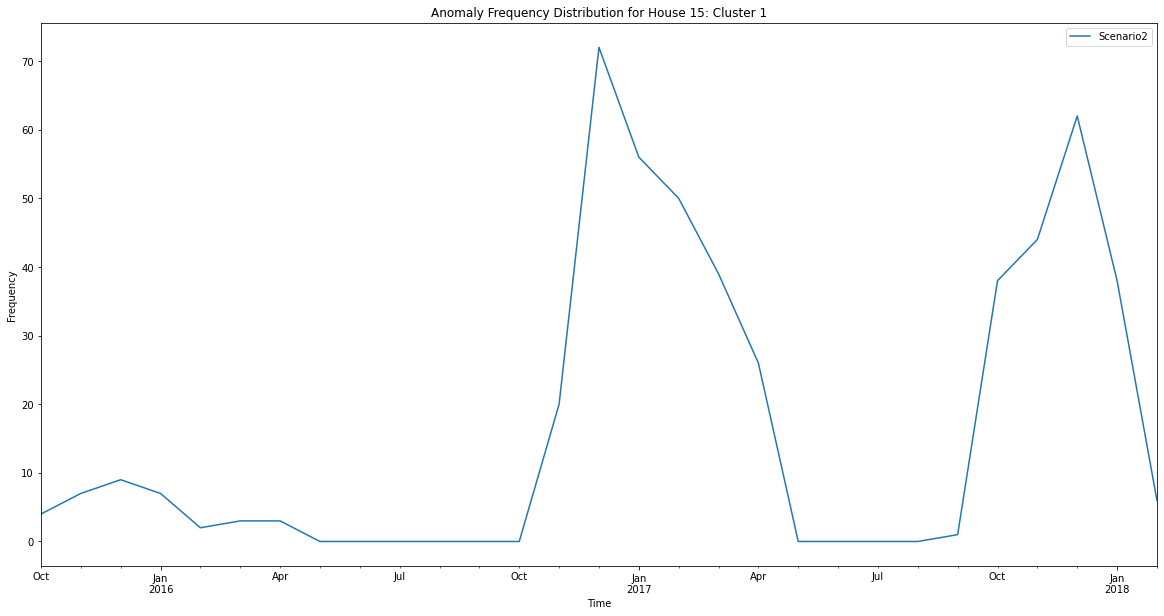

In [40]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 15: Cluster 1', Scenario2 = all_cluster_results[15])

In [41]:
create_distance_df( 'Similarity between anomaly distributions for House15: Cluster 1', Scenario2 = all_cluster_results[15]).round(decimals=2)

Similarity between anomaly distributions for House15: Cluster 1


/tmp/ipykernel_12231/3162963936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/3162963936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)


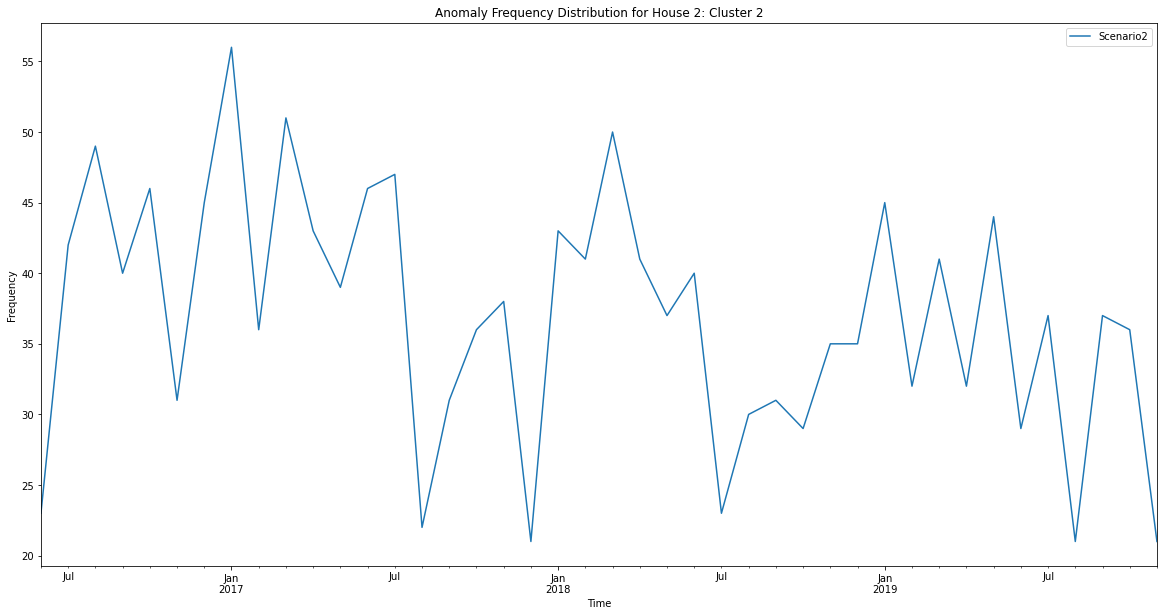

In [42]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 2: Cluster 2', Scenario2 = all_cluster_results[2])

In [43]:
create_distance_df( 'Similarity between anomaly distributions for House 2: Cluster 2', Scenario2 = all_cluster_results[2]).round(decimals=2)

Similarity between anomaly distributions for House 2: Cluster 2


/tmp/ipykernel_12231/3162963936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/3162963936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else 1)


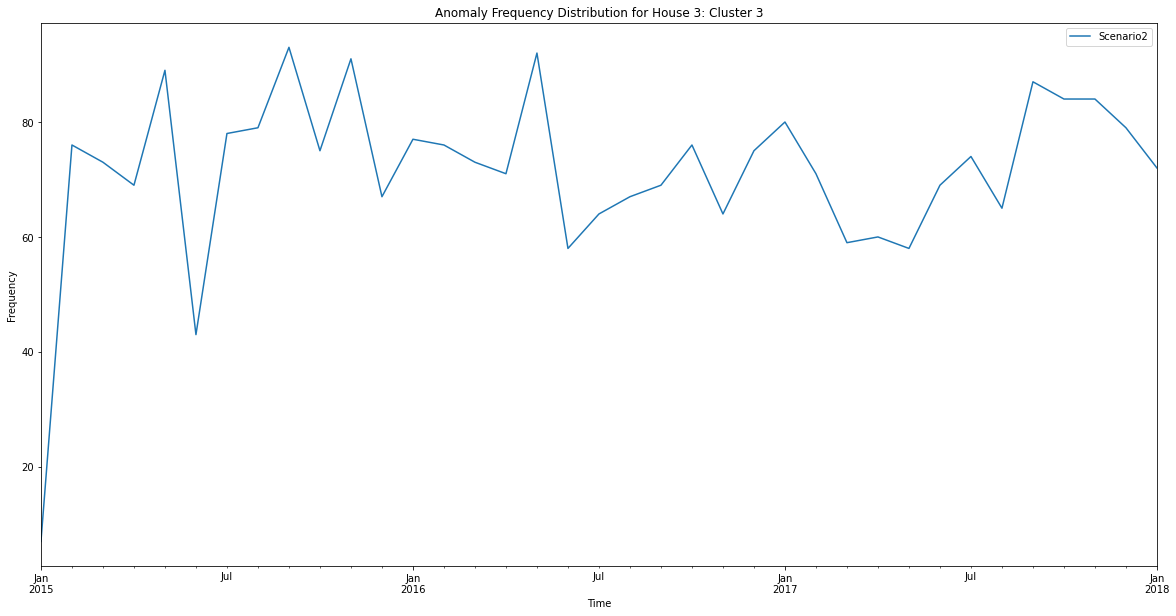

In [44]:
create_anomalies_graph( 'Anomaly Frequency Distribution for House 3: Cluster 3', Scenario2 = all_cluster_results[3])

In [45]:
create_distance_df( 'Similarity between anomaly distributions for House 3: Cluster 3', Scenario2 = all_cluster_results[3]).round(decimals=2)

Similarity between anomaly distributions for House 3: Cluster 3


/tmp/ipykernel_12231/3162963936.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_df['Anomaly detected'] = anomaly_df['Anomaly detected'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


#### Energy Deficit Calculation

In [46]:
def create_deficit_df(result_df, scenario_name, monthly_agg = True):    
    #print(type(result_df))
    energy_df = result_df[['timestamp', 'Energy Deficit Flag']]
    energy_df.set_index('timestamp', inplace = True)
    if monthly_agg:
        energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)
        energy_df = energy_df.resample("W").agg('sum')
    else: 
        energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)
    energy_df = energy_df.rename(columns={'Energy Deficit Flag': scenario_name})
    return energy_df

def create_energy_deficit_graph( title = None, **kwargs):
    energy_dfs = []
    for scenario_name, result_df in kwargs.items():
        energy_df = create_deficit_df(result_df, scenario_name)
        
        energy_dfs.append(energy_df)
    energy_df = functools.reduce(lambda left, right: left.join(right), energy_dfs)
    ax = energy_df.plot.line(figsize=(20,10))
    ax.set_xlabel(f'Time')
    ax.set_ylabel(f'Frequency')
    ax.set_title(title)

In [47]:
def create_deficit_distance_df(title, **kwargs):
    print(title)
    energy_dfs = []
    for scenario_name, result_df in kwargs.items():
        energy_df = np.array(create_deficit_df(result_df, scenario_name, monthly_agg=False)).reshape(1,-1)
        print(energy_df)
        energy_dfs.append(energy_df)
    energy_distributions = np.array(energy_dfs).reshape(len(kwargs),-1)
    distance_matrix = sd.squareform(sd.pdist(energy_distributions, dtw_distance))
    return(pd.DataFrame(distance_matrix, columns = kwargs.keys(), index = kwargs.keys()))

/tmp/ipykernel_12231/2530998586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)


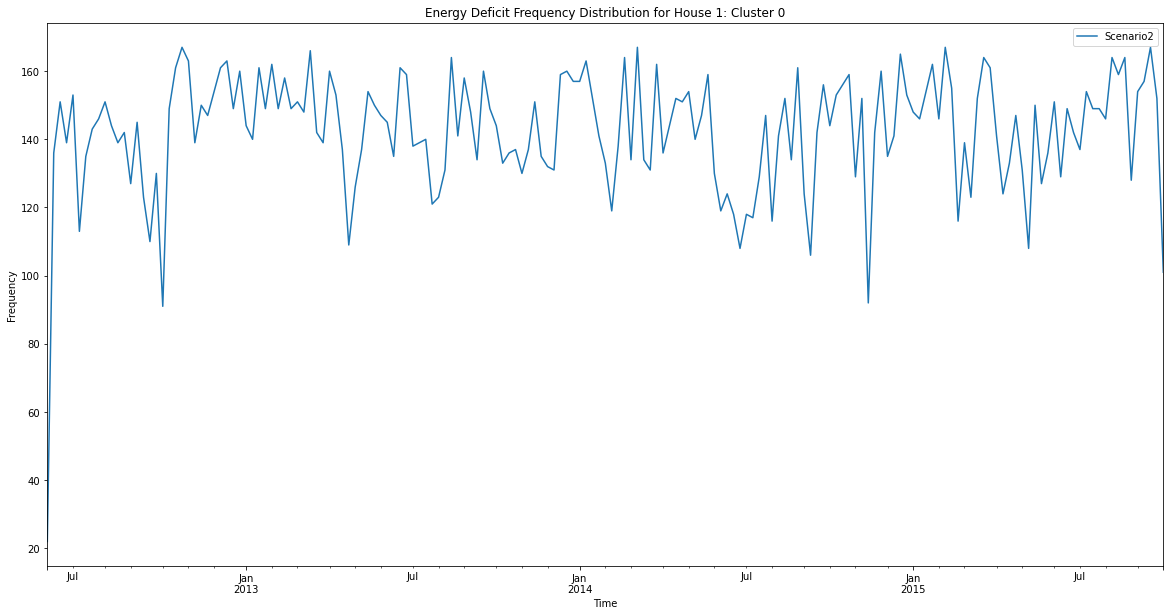

In [48]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 1: Cluster 0', Scenario2 = all_cluster_results[1])

In [49]:
create_deficit_distance_df('Similarity between energy deficit distributions for House1: Cluster 0', Scenario2 = all_cluster_results[1])

Similarity between energy deficit distributions for House1: Cluster 0
[[0.91610743 0.99398835 0.43734802 ... 0.90964573 0.64669755 0.73666454]]


/tmp/ipykernel_12231/2530998586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/2530998586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)


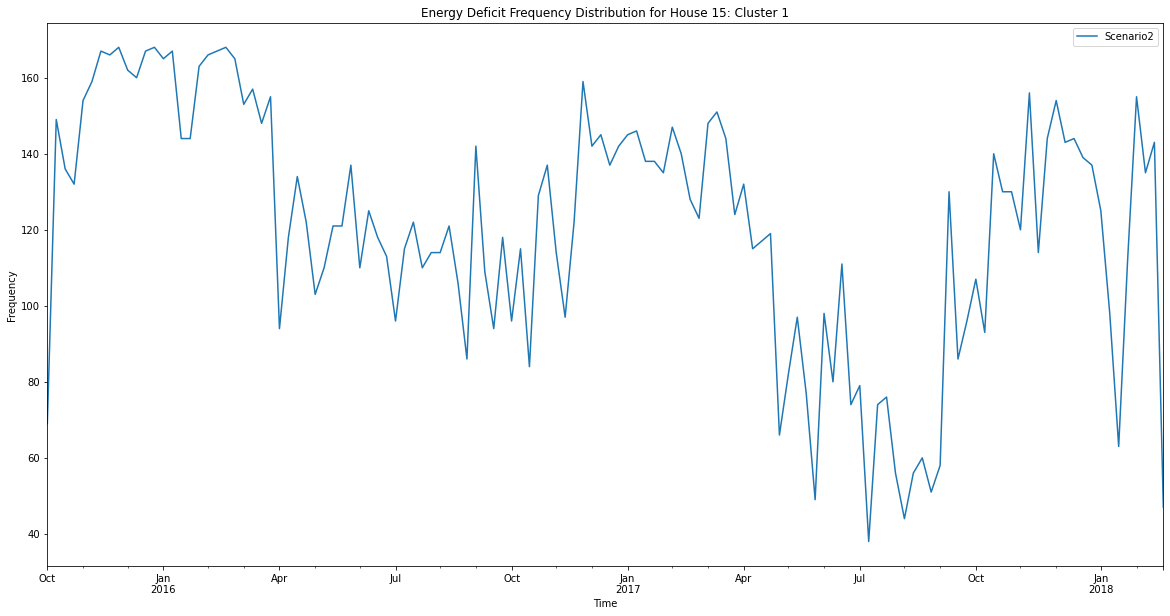

In [50]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 15: Cluster 1', Scenario2 = all_cluster_results[15])

In [51]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House15: Cluster 1', Scenario2 = all_cluster_results[15])

Similarity between energy deficit distributions for House15: Cluster 1
[[0.         0.         0.         ... 2.1125438  3.0802175  3.32348136]]


/tmp/ipykernel_12231/2530998586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/2530998586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)


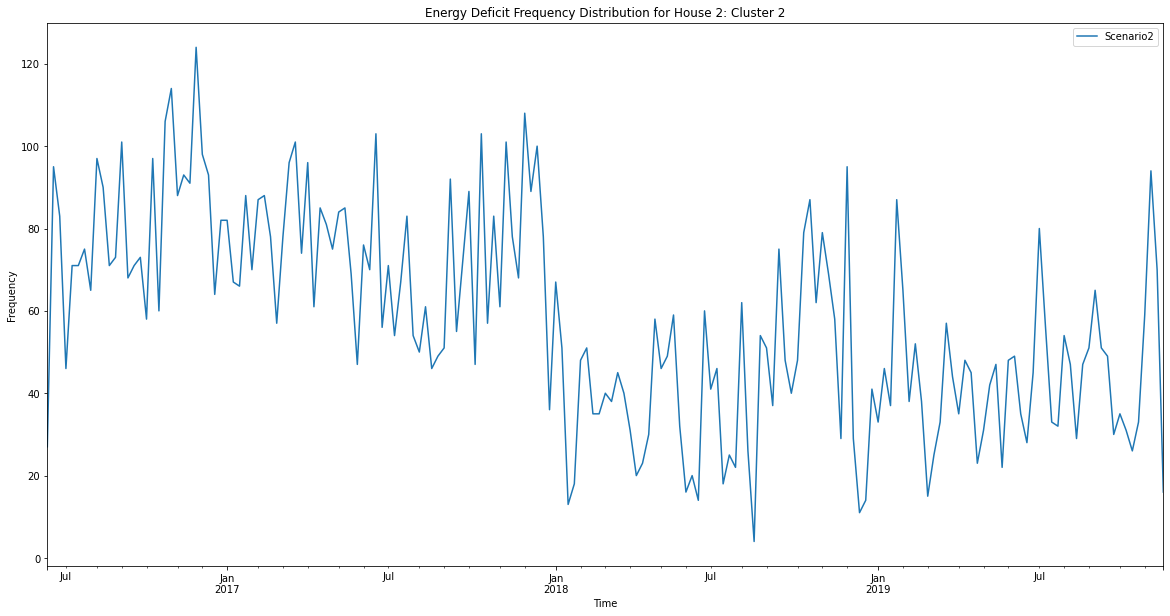

In [52]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 2: Cluster 2', Scenario2 = all_cluster_results[2])

In [53]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House 2: Cluster 2', Scenario2 = all_cluster_results[2])

Similarity between energy deficit distributions for House 2: Cluster 2
[[0.09839522 0.         0.         ... 0.         0.30541687 0.        ]]


/tmp/ipykernel_12231/2530998586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0


/tmp/ipykernel_12231/2530998586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else 1)


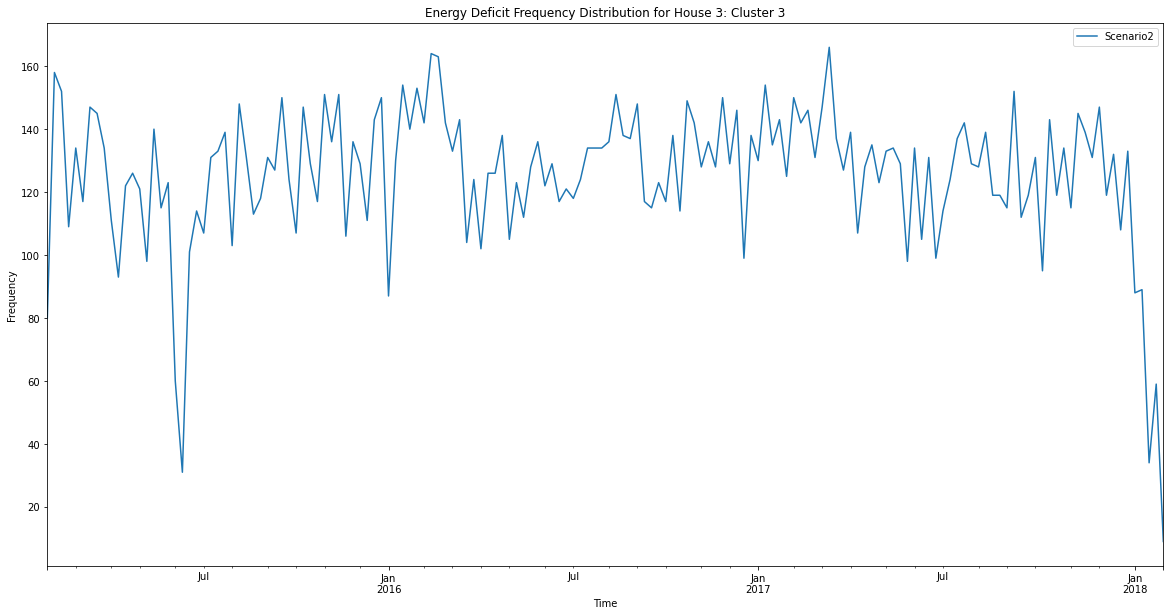

In [54]:
create_energy_deficit_graph( 'Energy Deficit Frequency Distribution for House 3: Cluster 3', Scenario2 = all_cluster_results[3])

In [55]:
create_deficit_distance_df( 'Similarity between energy deficit distributions for House 3: Cluster 3', Scenario2 = all_cluster_results[3])

Similarity between energy deficit distributions for House 3: Cluster 3
[[0.27204427 0.26990977 0.         ... 0.         0.         0.        ]]


/tmp/ipykernel_12231/2530998586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Energy Deficit Flag'] = energy_df['Energy Deficit Flag'].apply(lambda x: 0 if x is False else x)


,Scenario2
Scenario2,0.0
